In [1]:
# QUESTION 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
from sklearn.preprocessing import LabelEncoder
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
#adult_copy = adult.copy()



In [2]:
#listing the various feature names

print(list(adult.columns)) 

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']


In [3]:
# checking for total missing values in all features (no missing values were observed)

adult.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [4]:
# Checking the data types of all features

adult.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Splitting the data into numerics and objects to help with analysis

numerics = ['float64', 'int64']
numeric_ds = adult.select_dtypes(include=numerics)
objects_ds = adult.select_dtypes(exclude=numerics)

In [6]:
# Getting the descriptive statistics for the numerical variables

numeric_ds.describe() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Descriptive statistics for objects (the categorical variables)

objects_ds.describe().T 

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital_status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native_country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


In [8]:
#Correlation matrix

adult.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [78]:
# GRAPHICAL ANALYSIS (Numerics, Categorical, Numerics VS Categorical)

#The boxplots and histograms show that the numerical variables are not normally distributed hence will 
#check how they relate to the variable we are trying to predict and aggregate those variable in bins.

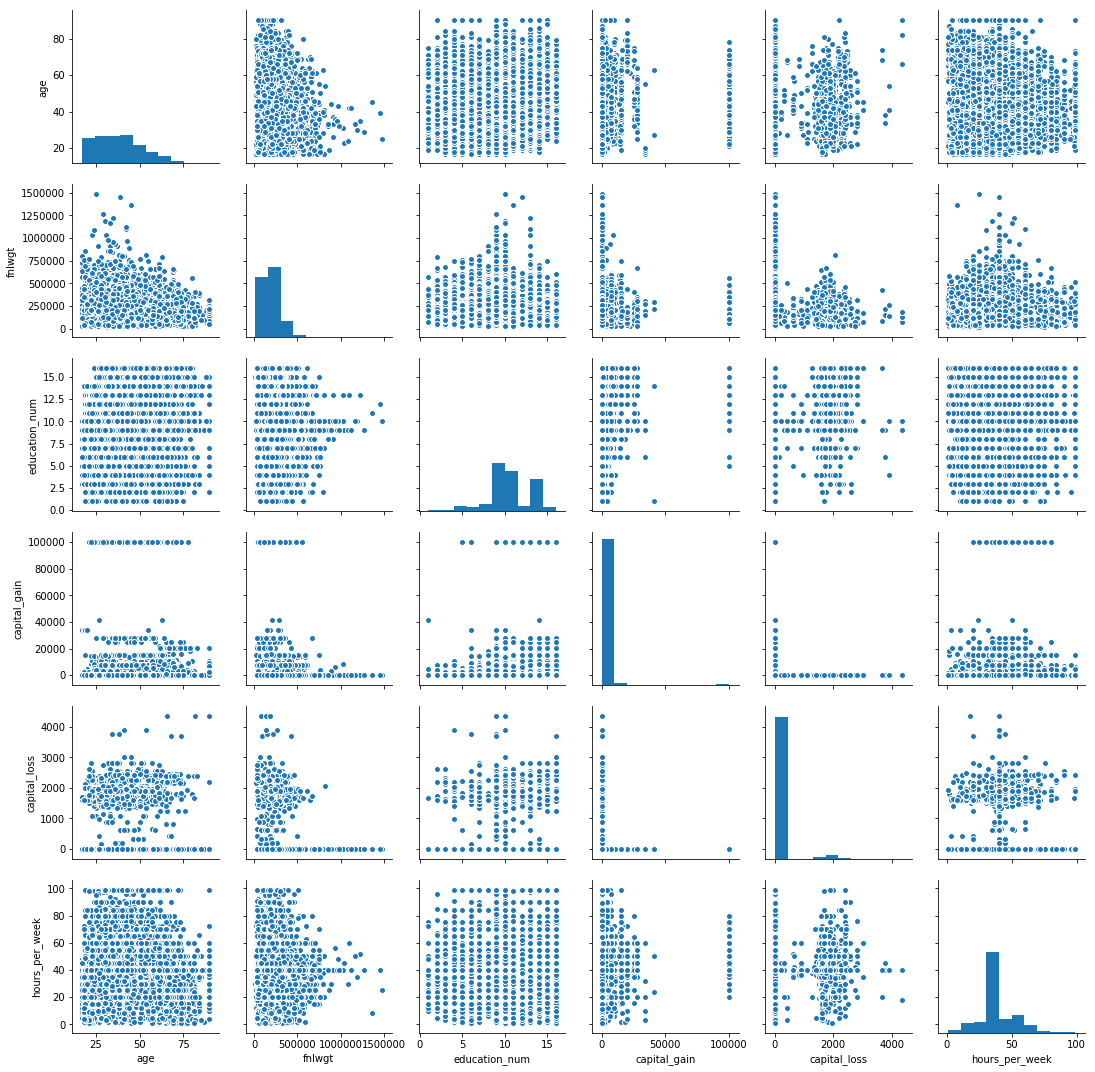

In [9]:
# Pairwise plot of numerical variables

sns.pairplot(adult, size=2.5)

[]

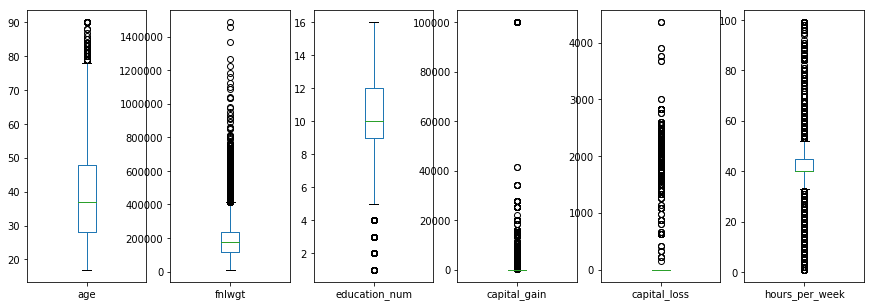

In [10]:
# Box plots for numerical variables

numeric_ds.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()

[]

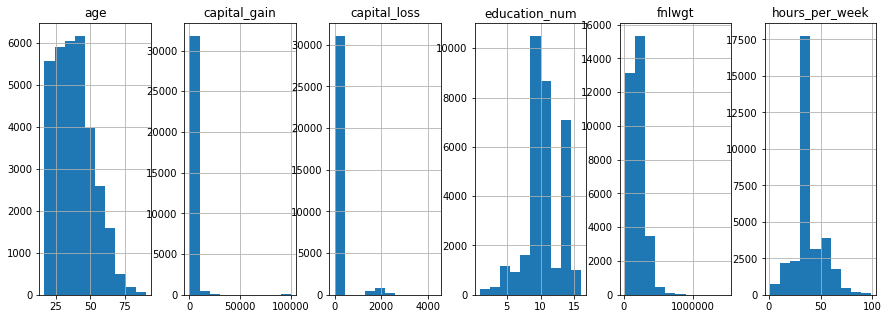

In [11]:
# Histogram plots for numerical variables

numeric_ds.hist(layout=(1,6),figsize=(15,5))
plt.plot()

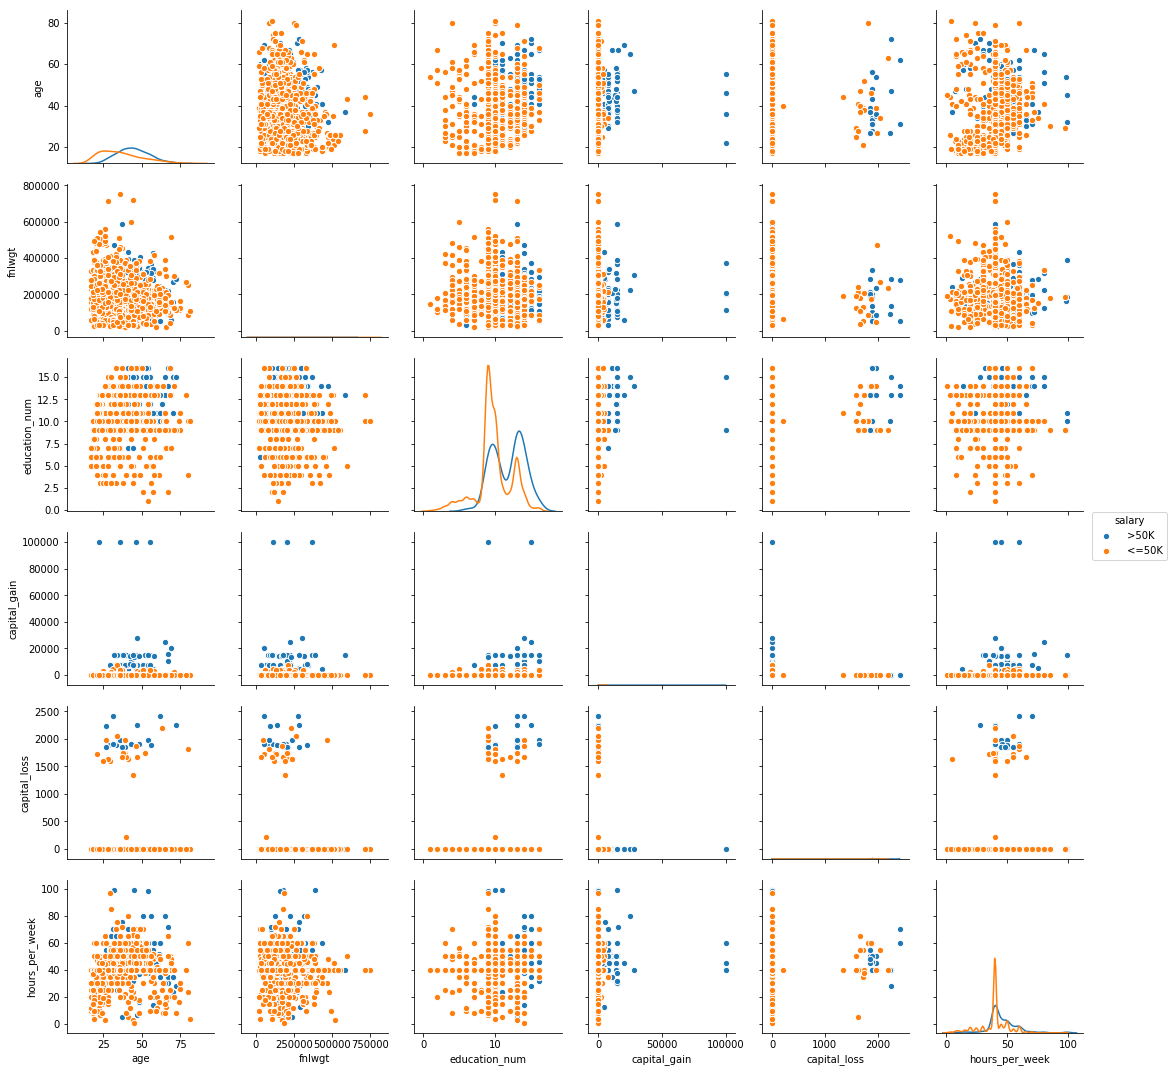

In [12]:
# Plotting the numerical data with the response variable "salary" to see how they are distributed

numeric_ds = pd.concat([numeric_ds,adult["salary"]],axis=1) 

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="salary")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

#Age and Hours_per_week seem to good predictors for salary from the graph above

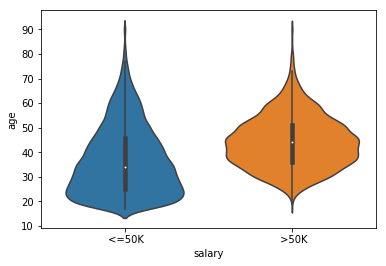

In [13]:
# Violin plot used to determine how to place bins around the variable "age"

sns.violinplot(x="salary", y="age", data=numeric_ds);

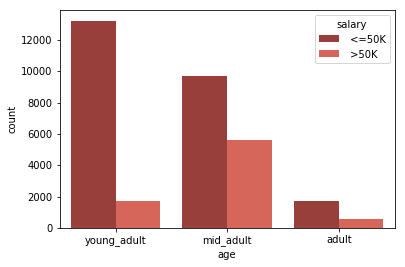

In [14]:
# Determining how many counts of the variable "age" fall in the two levels of salary

age_bins=pd.cut(numeric_ds["age"], bins=[0,35,60,80], labels=['young_adult','mid_adult','adult'])
sns.countplot(x=age_bins, hue="salary", data=numeric_ds, palette="Reds_d");

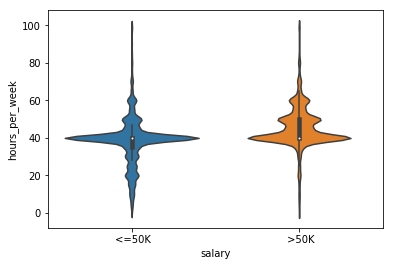

In [15]:
# Violin plot used to determine how to place bins around the variable "hours_per_week"

sns.violinplot(x="salary", y="hours_per_week", data=numeric_ds);

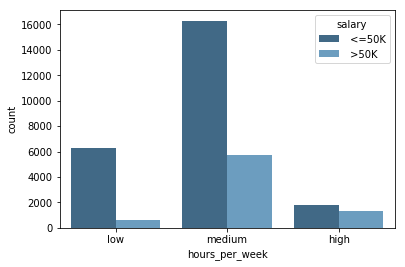

In [16]:
# Determining how many counts of the variable "hours_per_week" fall in the two levels of salary

hours_bins=pd.cut(numeric_ds["hours_per_week"], bins=[0,35,50,70], labels=['low','medium','high'])
sns.countplot(x=hours_bins, hue="salary", data=numeric_ds, palette="Blues_d");

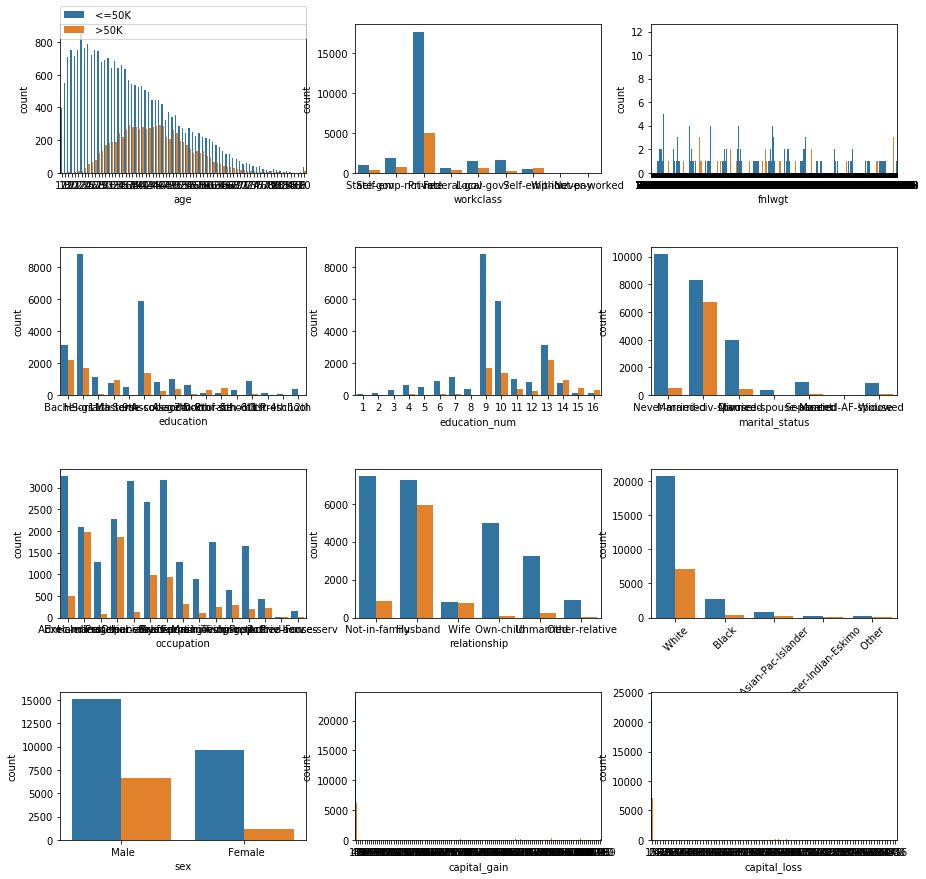

In [17]:
# Plots for categorical variables (they do not appear to be normally distributed)

fig,ax =plt.subplots(4,3,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,12):
    g = sns.countplot(x=adult.iloc[:,i], hue=adult["salary"],ax=ax[divmod(i,3)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=1, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[2,2].get_xticklabels():
    tick.set_rotation(45)

In [18]:
# Making a crosstab of the counts for sex

sex=pd.crosstab(index=adult["sex"],columns="count")      
#sex

In [19]:
# Making a crosstab of the probabilities of male and female
sex/sex.sum()

col_0,count
sex,
Female,0.330795
Male,0.669205


In [20]:
# Making a crosstab of the counts for race

race=pd.crosstab(index=adult["race"],columns="count")     
#race

In [21]:
# Getting the probabilities for the different levels of the factor race

race/race.sum()

col_0,count
race,
Amer-Indian-Eskimo,0.009551
Asian-Pac-Islander,0.031909
Black,0.095943
Other,0.008323
White,0.854274


In [22]:
# Making a crosstab of the counts for race

#native=pd.crosstab(index=adult["native_country"],columns="count")      


In [23]:
# Making a crosstab of the probabilities for each level of native_country

#native/native.sum()

In [24]:
# Making a crosstab of the counts for salary

#salary=pd.crosstab(index=adult["salary"],columns="count")      
#salary

In [25]:
# Making a crosstab of the probabilities for each level of salary

#salary/salary.sum()

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
from sklearn.preprocessing import LabelEncoder
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult_encoded = pd.get_dummies(adult, columns=['sex','race','relationship','occupation','marital_status',
                'workclass','education','native_country'], drop_first=True)
#print(adult_encoded)

In [27]:
# Dummy coding the categorical variables

In [28]:
gender = pd.get_dummies(adult['sex'],drop_first=True)


In [29]:
relation = pd.get_dummies(adult['relationship'],drop_first=True)


In [30]:
Race = pd.get_dummies(adult['race'],drop_first=True)


In [31]:
Country = pd.get_dummies(adult['native_country'],drop_first=True)


In [32]:
Status = pd.get_dummies(adult['marital_status'],drop_first=True)

In [33]:
Occup = pd.get_dummies(adult['occupation'],drop_first=True)

In [34]:
Work = pd.get_dummies(adult['workclass'],drop_first=True)

In [35]:
Education = pd.get_dummies(adult['education'],drop_first=True)

In [36]:
adult.drop(['sex','fnlwgt','race','relationship','occupation','marital_status','workclass','education',
           'native_country'],axis=1,inplace=True)


In [37]:
adult_dmy = pd.concat([adult,gender,Race,Country,Status,Occup,Work,Education],axis=1)
#adult_dmy.head()

In [38]:
Salary = pd.get_dummies(adult['salary'],drop_first=True)

In [39]:
adult.drop(['salary'],axis=1,inplace=True)

In [40]:
adult_dmyy = pd.concat([adult,gender,Race,Country,Status,Occup,Work,Education,Salary],axis=1)
# adult_dmyy.head()

In [41]:
# Logistic Regression, KNN Classifier, Naive Bayes and Decision Trees Models are compared and the best
# model is selected with respect to their test accuracies

In [42]:
## LOGISTIC REGRESSION

In [43]:
X = adult_dmyy[adult_dmyy.loc[:, adult_dmyy.columns != ' >50K'].columns]
y = adult_dmyy[' >50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


In [44]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.850
Test set score: 0.850


In [45]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.849
Test set score: 0.849


In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.846
Test set score: 0.849


In [47]:
#plt.plot(logreg.coef_.T, 'o', label="C=1")
#plt.plot(logreg100.coef_.T, '^', label="C=100")
#plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
#plt.xticks(range(adult_dmyy.shape[1]), adult_dmyy, rotation=80)
#xlims = plt.xlim()
#plt.hlines(0, xlims[0], xlims[1])
#plt.xlim(xlims)
#plt.ylim(-5, 5)
#plt.xlabel("Feature")
#plt.ylabel("Coefficient magnitude")
#plt.legend()

In [48]:
## KNN CLASSIFIER

In [49]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  


[[4528  498]
 [ 542  945]]
             precision    recall  f1-score   support

          0       0.89      0.90      0.90      5026
          1       0.65      0.64      0.65      1487

avg / total       0.84      0.84      0.84      6513



In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

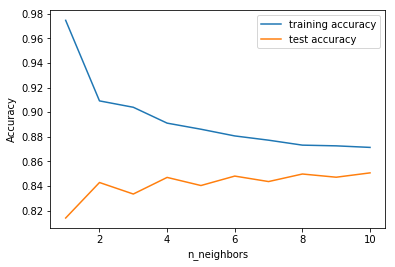

In [52]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [53]:
# USING NAIVE BAYES CLASSIFIER

In [54]:
# Building the classifier and training it with the training data

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred, normalize = True)

0.8303393213572854

In [56]:
## DECISION TREES

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on test set: 0.818


In [57]:
## Getting the AUC of the ROC using the Logistic Regression Model(logreg) 
#since it gave the highest test accuracy
##The AUC of the ROC is used as a measure of classifier performance

In [58]:
#getting the probabilities associated with buying or not buying insurance

probs=logreg.predict_proba(X_test)
probs 

#extracting the probabilities for those who buy insurance

def column(matrix, i):
  return [row[i] for row in matrix]  
probabilities = column(probs, 1)
# keep probabilities for the positive outcome only
pbbs = probs[:, 1]

AUC: 0.901


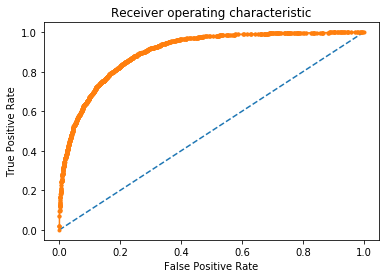

In [59]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
# calculate AUC
auc = roc_auc_score(y_test, pbbs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pbbs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
pyplot.show()

In [64]:
# The AUC probability of 0.901 can be interpreted as a 0.901  
#probability that the Logistic classifier will assign
# a higher score to a randomly chosen salary <=50K than to a 
#randomly chosen randomly chosen salary >50K